In [4]:
import Pkg; Pkg.add("DataFramesMeta")

 Resolving package versions...
 Installed DataFramesMeta ─ v0.4.1
  Updating `~/.julia/Project.toml`
  [1313f7d8] + DataFramesMeta v0.4.1
  Updating `~/.julia/Manifest.toml`
  [1313f7d8] + DataFramesMeta v0.4.1


In [1]:
using Statistics; using Plots
using DataFrames
using CSV
using DataFramesMeta
input = "Dane.csv"
rawdata = CSV.read(input, delim =";")                               # initial data

,Wojewodztwo,Rok,Gestosc zaludnienia na km2,Populacja,Ilosc malzenstw,Ilosc malzenstw koscielnych,Malzenstwa kobieta <=19 lat,Malzenstwa kobieta 20-24 lat,Malzenstwa kobieta 25-29 lat,Malzenstwa kobieta 30-39 lat,Malzenstwa kobieta 40-49 lat,Malzenstwa kobieta >=50 lat,Malzenstwa mezczyzna <=19 lat,Malzenstwa mezczyzna 20-24 lat,Malzenstwa mezczyzna 25-29 lat,Malzenstwa mezczyzna 30-39 lat,Malzenstwa mezczyzna 40-49 lat,Malzenstwa mezczyzna >=50 lat,Malzenstwa kobieta pochodzi ze wsi,Malzenstwa mezczyzna pochodzi ze wsi,Ilosc rozwodow,Rozwody zainicjowane przez osoby ze wsi,Rozwody zainicjowane przez kobiety <=24 lat,Rozwody zainicjowane przez kobiety 25-29 lat,Rozwody zainicjowane przez kobiety 30-39 lat,Rozwody zainicjowane przez kobiety 40-49 lat,Rozwody zainicjowane przez kobiety >=50 lat,Rozwody zainicjowane przez mezczyzn <=24 lat,Rozwody zainicjowane przez mezczyzn 25-29 lat,Rozwody zainicjowane przez mezczyzn 30-39 lat,Rozwody zainicjowane przez mezczyzn 40-49 lat,Rozwody zainicjowane przez mezczyzn >=50 lat,srednie zarobki,Ilosc zatrudnionych kobiet,Wspolczynnik feminizacji,Dzietnosc,Zgony niemowlat na 1000 urodzonych,Rozwody przy braku dzieci,Rozwody przy 1 dziecku,Rozwody przy 2 dzieciach,Rozwody przy 3 dzieciach,Rozwody przy >=4 dzieciach,Rozwody z powodu niedochowania wiernosci,Rozwody z powodu naduzycia alkoholu,Rozwody z powodu naganndego stosuknu do czlonkow rodziny,Rozwody z powodu trudnosci mieszkaniowych,Rozwody z powodu nieporozumien na tle finansowym,Rozwody z powodu niezgodnosci charakterow,Rozwody z powodu niedoboru seksualnego,Rozwody z powodu dluzszej nieobecnosci,Rozwody z powodu roznic swiatopogladowych
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,Int64⍰,Int64⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,DOLNOSLASKIE,2002,146,2912218,13619,8901,1243,6202,3603,1121,600,670,225,4348,5174,2094,703,847,3890,3905,5020,660,457,1005,1595,1325,638,181,804,1692,1505,838,"2165,84",414722,108,"1,129","9,8",1809,2060,934,178,39,719,598,270,17,159,1330,26,33,4
2,KUJAWSKO-POMORSKIE,2002,115,2066704,10513,7514,1115,5249,2716,756,328,349,219,3808,4106,1441,396,449,4198,4155,2788,438,266,651,864,721,286,114,524,958,813,379,"1953,39",300035,107,"1,287","8,5",961,1185,507,101,34,444,337,260,12,111,1028,25,10,0
3,LUBELSKIE,2002,87,2185654,11842,9261,1370,6125,3126,798,210,214,305,4332,4849,1584,376,315,6232,6387,2019,493,148,407,712,504,248,53,304,783,544,335,"1941,01",348886,106,"1,333","7,8",697,791,395,96,40,138,213,151,4,54,850,10,0,0
4,LUBUSKIE,2002,72,1007131,4442,2975,389,2059,1264,328,188,211,62,1404,1780,625,228,261,1503,1518,1479,305,125,309,472,410,163,39,247,527,441,225,"1936,54",134453,106,"1,226","7,4",520,571,306,65,17,186,108,71,5,24,395,4,0,0
5,LODZKIE,2002,143,2605310,12900,9516,1153,6258,3744,981,392,484,264,4469,5171,1748,503,618,4648,4786,3533,448,286,731,1205,880,431,95,589,1269,1027,553,"1966,22",423136,110,"1,183",8,1334,1490,577,107,25,451,402,97,17,127,910,19,5,0
6,MALOPOLSKIE,2002,214,3249117,16993,13644,1694,8483,4543,1285,363,336,342,5971,6929,2581,512,511,8513,8669,2492,511,184,489,840,661,318,64,376,895,721,436,"2060,99",479017,106,"1,34","6,8",994,960,433,81,24,312,166,190,8,67,547,24,14,0
7,MAZOWIECKIE,2002,144,5120420,26141,19292,2434,11887,7207,2122,803,928,433,8504,10304,4057,1175,1326,9556,9617,5855,766,459,1225,1839,1581,751,164,932,2036,1663,1060,"2893,83",988217,108,"1,237","6,4",2531,2213,905,156,50,572,413,139,20,103,2311,40,4,1
8,OPOLSKIE,2002,113,1063541,4756,3203,592,2237,1188,356,132,163,115,1637,1895,659,201,191,2064,2128,1122,249,113,223,369,306,111,43,186,414,318,161,"2029,99",137660,106,"1,053","5,3",394,460,208,40,20,144,119,70,5,30,512,5,9,0
9,PODKARPACKIE,2002,117,2087954,11097,9003,1237,5869,2866,732,176,187,26

In [2]:
# 1 województwa
# 2 rok
# 3 gęstośc zaludnienia
# 4 populacja
# 5 ile małżeństw
# 6 ile małżeństw kościelnych
# 7-12 wiek kobiety
# 13-18 wiek mężczyzny
# 19 ile gdy kobieta ze wsi
# 20 ile gdy facet ze wsi
# 21 ile rozwodów
# 22 ile zainicjowane przez tego ze wsi
# 23-27 przez kobietę o wieku...
# 28-32 przez mężczyznę o wieku...
# 33-37 czynniki różne
# 38-42 ile dzieci gdy rozwód
# 43-51 różne powody

In [3]:
relevantdata = DataFrame(
    wojewodztwo = rawdata[:, :1],
    rok = rawdata[:, :2],
    populacja = rawdata[:, :4],
    malzenstwa = rawdata[:, :5],
    koscielne = rawdata[:, :6]./rawdata[:, :5],  # ile w stosunku do cywilnych
    kob19 = rawdata[:, :7]./rawdata[:, :5],
    kob2024 = rawdata[:, :8]./rawdata[:, :5],
    kob2529 = rawdata[:, :9]./rawdata[:, :5],
    kob3039 = rawdata[:, :10]./rawdata[:, :5],     # w stosunku do wszystkich małżeństw
    kob4049 = rawdata[:, :11]./rawdata[:, :5],
    kob50 = rawdata[:, :12]./rawdata[:, :5],
    mez19 = rawdata[:, :13]./rawdata[:, :5],
    mez2024 = rawdata[:, :14]./rawdata[:, :5],
    mez2529 = rawdata[:, :15]./rawdata[:, :5],
    mez3039 = rawdata[:, :16]./rawdata[:, :5],
    mez4049 = rawdata[:, :17]./rawdata[:, :5],
    mez50 = rawdata[:, :18]./rawdata[:, :5],
    kobWies = rawdata[:, :19]./rawdata[:, :5],
    mezWies = rawdata[:, :20]./rawdata[:, :5],
    rozwody = rawdata[:, :21],
    rozwodyProcent = rawdata[:, :21]./rawdata[:, :5],   # vvv stosunek rozwodów przez osoby ze wsi do ogólnych rozwodów
    przezWies = (rawdata[:, :22]./(rawdata[:, :19]+rawdata[:, :20]))./(rawdata[:, :21]./(rawdata[:, :5]*2)),
    przezkob24 = rawdata[:, :23]./rawdata[:, :21],
    przezkob2529 = rawdata[:, :24]./rawdata[:, :21],
    przezkob3039 = rawdata[:, :25]./rawdata[:, :21],    # ile w stosunku do wszystkich
    przezkob4049 = rawdata[:, :26]./rawdata[:, :21],
    przezkob50 = rawdata[:, :27]./rawdata[:, :21],
    przezmez24 = rawdata[:, :28]./rawdata[:, :21],
    przezmez2529 = rawdata[:, :29]./rawdata[:, :21],
    przezmez3039 = rawdata[:, :30]./rawdata[:, :21],
    przezmez4049 = rawdata[:, :31]./rawdata[:, :21],
    przezmez50 = rawdata[:, :32]./rawdata[:, :21],
    zatrudnioneKob = rawdata[:, :34]./rawdata[:, :4]*2,     # jaki % kobiet zatrudniony
    zdrada = rawdata[:, :43]./rawdata[:, :21],
    alkochol = rawdata[:, :44]./rawdata[:, :21],
    rodzina = rawdata[:, :45]./rawdata[:, :21],
    mieszkanie = rawdata[:, :46]./rawdata[:, :21],          # przyczyny jakiego % wszystkich rozwodów
    finanse = rawdata[:, :47]./rawdata[:, :21],
    charaktery = rawdata[:, :48]./rawdata[:, :21],
    seks = rawdata[:, :49]./rawdata[:, :21],
    nieobecnosc = rawdata[:, :50]./rawdata[:, :21],
    poglady = rawdata[:, :51]./rawdata[:, :21]
    )
# ze współczynnikiem feminizacji nie ma co zrobić bo są za małe różnice, żeby coś wnioskować, podobnie dzietność
# średnie zarobki się wszędzie stale zmieniają, raczej nie da się z tego wyciągnąć wniosków, podobnie śmiertelność dzieci

,wojewodztwo,rok,populacja,malzenstwa,koscielne,kob19,kob2024,kob2529,kob3039,kob4049,kob50,mez19,mez2024,mez2529,mez3039,mez4049,mez50,kobWies,mezWies,rozwody,rozwodyProcent,przezWies,przezkob24,przezkob2529,przezkob3039,przezkob4049,przezkob50,przezmez24,przezmez2529,przezmez3039,przezmez4049,przezmez50,zatrudnioneKob,zdrada,alkochol,rodzina,mieszkanie,finanse,charaktery,seks,nieobecnosc,poglady
,String⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,DOLNOSLASKIE,2002,2912218,13619,0.653572,0.0912695,0.455393,0.264557,0.0823115,0.0440561,0.049196,0.016521,0.31926,0.37991,0.153756,0.0516191,0.0621925,0.28563,0.286732,5020,0.368603,0.459409,0.0910359,0.200199,0.317729,0.263944,0.127092,0.0360558,0.160159,0.337052,0.299801,0.166932,0.284815,0.143227,0.119124,0.0537849,0.00338645,0.0316733,0.26494,0.00517928,0.00657371,0.000796813
2,KUJAWSKO-POMORSKIE,2002,2066704,10513,0.714734,0.106059,0.499287,0.258347,0.071911,0.0311995,0.033197,0.0208314,0.362218,0.390564,0.137068,0.0376676,0.042709,0.399315,0.395225,2788,0.265195,0.395454,0.0954089,0.233501,0.3099,0.258608,0.102582,0.0408895,0.187948,0.343615,0.291607,0.13594,0.290351,0.159254,0.120875,0.0932568,0.00430416,0.0398135,0.368723,0.008967,0.0035868,0.0
3,LUBELSKIE,2002,2185654,11842,0.782047,0.11569,0.517227,0.263976,0.0673873,0.0177335,0.0180713,0.0257558,0.365817,0.409475,0.133761,0.0317514,0.0266002,0.526262,0.539351,2019,0.170495,0.45829,0.0733036,0.201585,0.35265,0.249629,0.122833,0.0262506,0.15057,0.387816,0.26944,0.165924,0.319251,0.0683507,0.105498,0.0747895,0.00198118,0.0267459,0.421,0.00495295,0.0,0.0
4,LUBUSKIE,2002,1007131,4442,0.669743,0.0875732,0.46353,0.284557,0.0738406,0.0423233,0.0475011,0.0139577,0.316074,0.40072,0.140702,0.0513282,0.0587573,0.338361,0.341738,1479,0.332958,0.606442,0.0845166,0.208925,0.319135,0.277214,0.11021,0.0263692,0.167005,0.356322,0.298174,0.15213,0.267002,0.125761,0.0730223,0.0480054,0.00338066,0.0162272,0.267072,0.00270453,0.0,0.0
5,LODZKIE,2002,2605310,12900,0.737674,0.0893798,0.485116,0.290233,0.0760465,0.0303876,0.0375194,0.0204651,0.346434,0.400853,0.135504,0.0389922,0.047907,0.36031,0.371008,3533,0.273876,0.346783,0.080951,0.206906,0.34107,0.24908,0.121993,0.0268893,0.166714,0.359185,0.290688,0.156524,0.324826,0.127654,0.113784,0.0274554,0.00481177,0.0359468,0.257571,0.00537787,0.00141523,0.0
6,MALOPOLSKIE,2002,3249117,16993,0.802919,0.0996881,0.499206,0.267345,0.0756194,0.0213617,0.0197728,0.0201259,0.35138,0.407756,0.151886,0.0301301,0.0300712,0.500971,0.510151,2492,0.146649,0.405601,0.0738363,0.196228,0.337079,0.265249,0.127608,0.0256822,0.150883,0.359149,0.289326,0.17496,0.29486,0.125201,0.0666132,0.076244,0.00321027,0.026886,0.219502,0.00963082,0.00561798,0.0
7,MAZOWIECKIE,2002,5120420,26141,0.737998,0.0931104,0.454726,0.275697,0.0811752,0.030718,0.0354998,0.016564,0.325313,0.39417,0.155197,0.0449485,0.0507249,0.365556,0.36789,5855,0.223978,0.35675,0.0783945,0.209223,0.314091,0.270026,0.128266,0.0280102,0.15918,0.347737,0.284031,0.181042,0.385991,0.0976943,0.070538,0.0237404,0.00341588,0.0175918,0.394705,0.00683177,0.000683177,0.000170794
8,OPOLSKIE,2002,1063541,4756,0.673465,0.124474,0.470353,0.24979,0.0748528,0.0277544,0.0342725,0.02418,0.344197,0.398444,0.138562,0.0422624,0.0401598,0.433978,0.447435,1122,0.235913,0.503567,0.100713,0.198752,0.328877,0.272727,0.0989305,0.0383244,0.165775,0.368984,0.283422,0.143494,0.258871,0.128342,0.106061,0.0623886,0.00445633,0.026738,0.456328,0.00445633,0.00802139,0.0
9,PODKARPACKIE,2002,2087954,11097,0.8113,0.111472,0.528882,0.258268,0.0659638,0.0158601,0.0168514,0.0235199,0.377309,0.412003,0.130666,0.0246914,0.0230693,0.58286,0.5907,1677,0.151122,0.476611,0.0954085,0.20811,0.323792,0.261181,0.111509,0.0494931,0.1

In [4]:
df = sort!(relevantdata)

dolnoslaskie = df[1:16, :]
kujawsko = df[17:32, :]
lodzkie = df[33:48, :]
lubelskie = df[49:64, :]
lubuskie = df[65:80, :]
malopolskie = df[81:96, :]
mazowieckie = df[97:112, :]
opolskie = df[113:128, :]
podkarpackie = df[129:144, :]
podlaskie = df[145:160, :]
pomorskie = df[161:176, :]
slaskie = df[177:192, :]
swientokrzyskie = df[193:208, :]
warminsko = df[209:224, :]
wielkopolskie = df[225:240, :]
zachodnio = df[241:256, :]               # wyodrębnione dane dla poszczególnych województw

,wojewodztwo,rok,populacja,malzenstwa,koscielne,kob19,kob2024,kob2529,kob3039,kob4049,kob50,mez19,mez2024,mez2529,mez3039,mez4049,mez50,kobWies,mezWies,rozwody,rozwodyProcent,przezWies,przezkob24,przezkob2529,przezkob3039,przezkob4049,przezkob50,przezmez24,przezmez2529,przezmez3039,przezmez4049,przezmez50,zatrudnioneKob,zdrada,alkochol,rodzina,mieszkanie,finanse,charaktery,seks,nieobecnosc,poglady
,String⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,ZACHODNIOPOMORSKIE,2002,1694044,7693,0.617704,0.0919017,0.434421,0.275055,0.0917717,0.044196,0.0539451,0.0129988,0.296243,0.383855,0.157936,0.0565449,0.0705836,0.291564,0.290134,2811,0.365397,0.466012,0.0693703,0.205977,0.3127,0.273568,0.138385,0.0245464,0.153326,0.334756,0.307008,0.180363,0.273562,0.174671,0.09783,0.0366418,0.00249022,0.0284596,0.26752,0.0039132,0.00320171,0.0
2,ZACHODNIOPOMORSKIE,2003,1694044,7748,0.613449,0.0709861,0.421657,0.30111,0.103252,0.0482705,0.0561435,0.0104543,0.276588,0.381776,0.177981,0.0580795,0.0724058,0.293495,0.293108,2909,0.375452,0.464127,0.0794087,0.209007,0.311103,0.26504,0.135442,0.0281884,0.15538,0.340667,0.294603,0.181162,0.2674,0.156411,0.0910966,0.0343761,0.00206256,0.0305947,0.300447,0.00137504,0.00275009,0.000343761
3,ZACHODNIOPOMORSKIE,2004,1694044,7402,0.626182,0.0594434,0.411375,0.327344,0.11024,0.0455282,0.0544447,0.00851121,0.246825,0.405836,0.187787,0.0555255,0.0722778,0.301675,0.29465,3510,0.474196,0.519803,0.0509972,0.202564,0.352707,0.267521,0.126211,0.0190883,0.134188,0.375783,0.302279,0.168661,0.267038,0.159259,0.103134,0.0333333,0.0017094,0.0245014,0.316809,0.0037037,0.0039886,0.0
4,ZACHODNIOPOMORSKIE,2005,1694044,8441,0.609762,0.0517711,0.382182,0.356237,0.121076,0.042649,0.048454,0.00533112,0.225566,0.411444,0.220708,0.0547329,0.0632626,0.304466,0.294159,3678,0.43573,0.647668,0.0589995,0.178358,0.372757,0.272703,0.117183,0.0198477,0.124252,0.374116,0.310495,0.171289,0.27236,0.101686,0.074497,0.026373,0.00190321,0.016857,0.252583,0.00353453,0.00679717,0.000543774
5,ZACHODNIOPOMORSKIE,2006,1694044,9778,0.600839,0.0469421,0.362855,0.351912,0.147883,0.0462262,0.0456126,0.00480671,0.199632,0.406013,0.248722,0.0576805,0.0663735,0.317038,0.31622,4645,0.475046,0.526265,0.0512379,0.180624,0.365339,0.259849,0.142949,0.0152853,0.122497,0.365554,0.296448,0.200215,0.280558,0.113025,0.0876211,0.021098,0.000645856,0.0262648,0.240258,0.00301399,0.00775027,0.0
6,ZACHODNIOPOMORSKIE,2007,1694044,10893,0.595612,0.0409437,0.347379,0.359956,0.15845,0.0433306,0.0446158,0.00596713,0.19563,0.398788,0.265492,0.0583861,0.0627926,0.320848,0.321032,3703,0.339943,0.545252,0.0494194,0.168512,0.388334,0.236565,0.15717,0.0132325,0.102079,0.399946,0.275182,0.20956,0.287075,0.115582,0.068593,0.0288955,0.00162031,0.015933,0.222792,0.00324062,0.021064,0.00324062
7,ZACHODNIOPOMORSKIE,2008,1694044,11579,0.602902,0.0410225,0.322308,0.367735,0.16884,0.0436998,0.046118,0.00552725,0.186026,0.401244,0.270662,0.0600225,0.0626134,0.324208,0.321962,3784,0.326799,1.16396,0.05074,0.172304,0.372886,0.236522,0.167548,0.016649,0.107822,0.376057,0.276163,0.223309,0.293629,0.138742,0.0626321,0.0256342,0.00184989,0.0153277,0.19741,0.00264271,0.0216702,0.00343552
8,ZACHODNIOPOMORSKIE,2009,1694044,11048,0.569786,0.0333997,0.30286,0.386767,0.181571,0.0458907,0.0470673,0.00325851,0.164555,0.410663,0.281861,0.0593773,0.0660753,0.310011,0.312274,3804,0.344316,0.545799,0.0449527,0.154837,0.399054,0.237119,0.164038,0.0168244,0.0977918,0.379863,0.286278,0.219243,0.284913,0.147213,0.0820189,0.0252366,0.00131441,0.0378549,0.272345,0.0042061,0.0312829,0.00499474
9,ZACHODNIOPOMORSKIE,2010,1716936,9521,0.552463,0.0267829,0.284319,0.389455,0.195148,0.0436929,0.0470539,0.00241571,0.148829,0.399643,0.30522,0.0598677

In [5]:
df2 = sort!(relevantdata, [:rok])

y2002 = df2[1:16, :]
y2003 = df2[17:32, :]
y2004 = df2[33:48, :]
y2005 = df2[49:64, :]
y2006 = df2[65:80, :]
y2007 = df2[81:96, :]
y2008 = df2[97:112, :]
y2009 = df2[113:128, :]
y2010 = df2[129:144, :]
y2011 = df2[145:160, :]
y2012 = df2[161:176, :]
y2013 = df2[177:192, :]
y2014 = df2[193:208, :]
y2015 = df2[209:224, :]
y2016 = df2[225:240, :]
y2017 = df2[241:256, :]               # wyodrębnione dane dla poszczególnych lat

,wojewodztwo,rok,populacja,malzenstwa,koscielne,kob19,kob2024,kob2529,kob3039,kob4049,kob50,mez19,mez2024,mez2529,mez3039,mez4049,mez50,kobWies,mezWies,rozwody,rozwodyProcent,przezWies,przezkob24,przezkob2529,przezkob3039,przezkob4049,przezkob50,przezmez24,przezmez2529,przezmez3039,przezmez4049,przezmez50,zatrudnioneKob,zdrada,alkochol,rodzina,mieszkanie,finanse,charaktery,seks,nieobecnosc,poglady
,String⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,DOLNOSLASKIE,2017,2912218,13919,0.511315,0.00883684,0.192543,0.373662,0.27581,0.0806092,0.0614987,0.00122135,0.0826209,0.343559,0.373877,0.100654,0.0852791,0.309289,0.303686,5946,0.427186,0.669456,0.0248907,0.11739,0.416751,0.274638,0.16633,0.00706357,0.0667676,0.38446,0.31517,0.226539,0.368385,0.0385133,0.0198453,0.00622267,0.00235452,0.00773629,0.111335,0.000840901,0.0124453,0.00437269
2,KUJAWSKO-POMORSKIE,2017,2084675,10193,0.587462,0.0145198,0.253213,0.389287,0.233395,0.0675954,0.0520946,0.00235456,0.119003,0.378103,0.336702,0.0863338,0.0689689,0.421956,0.413323,3877,0.380359,0.770139,0.0309518,0.122259,0.406758,0.288109,0.151922,0.00799587,0.0683518,0.39025,0.326025,0.207377,0.329563,0.0459118,0.026309,0.00619035,0.0,0.00464277,0.199897,0.00103173,0.00928553,0.000257931
3,LODZKIE,2017,2477777,11542,0.623202,0.012043,0.22795,0.419425,0.232802,0.0613412,0.050078,0.00294576,0.103015,0.404869,0.338503,0.0733842,0.0702651,0.388148,0.378184,4420,0.382949,0.663678,0.0298643,0.108371,0.414932,0.290724,0.156109,0.00972851,0.0638009,0.38733,0.327376,0.211765,0.388548,0.0506787,0.0323529,0.0108597,0.000226244,0.0108597,0.176471,0.00158371,0.0115385,0.00271493
4,LUBELSKIE,2017,2135409,10568,0.712812,0.0163702,0.280659,0.444928,0.203634,0.0429599,0.028293,0.00246026,0.136828,0.437358,0.325227,0.0510977,0.0413512,0.560276,0.54419,3347,0.316711,0.70334,0.0346579,0.141321,0.411413,0.259635,0.152973,0.0083657,0.0872423,0.380639,0.313714,0.210039,0.383546,0.0427248,0.0373469,0.0113535,0.00179265,0.00567673,0.233343,0.00268898,0.0161339,0.000896325
5,LUBUSKIE,2017,1021119,4953,0.504946,0.0100949,0.188371,0.373309,0.276196,0.0821724,0.0595599,0.00262467,0.084999,0.333333,0.380174,0.10317,0.0831819,0.3404,0.346457,1843,0.372098,0.807346,0.0244167,0.10255,0.419425,0.284862,0.168747,0.0081389,0.0537168,0.376017,0.33261,0.229517,0.322715,0.110689,0.0645686,0.0168204,0.00108519,0.0135648,0.266413,0.00922409,0.0271297,0.0113945
6,MALOPOLSKIE,2017,3385762,18305,0.716416,0.0175908,0.293089,0.408577,0.206392,0.0408085,0.026714,0.00213057,0.141,0.436875,0.318274,0.0568697,0.0396613,0.535427,0.52024,4330,0.236547,0.665931,0.0311778,0.147575,0.411085,0.269053,0.141109,0.00993072,0.0859122,0.403695,0.299769,0.200693,0.404241,0.0810624,0.0545035,0.0168591,0.00138568,0.0133949,0.303464,0.00230947,0.0198614,0.00438799
7,MAZOWIECKIE,2017,5369329,27142,0.631862,0.011053,0.218296,0.395918,0.257092,0.0558176,0.0430698,0.0024685,0.103751,0.389986,0.359775,0.0750129,0.062302,0.362648,0.359259,9040,0.333063,0.58596,0.0219027,0.112058,0.424779,0.294027,0.147235,0.00674779,0.0639381,0.382301,0.336726,0.210288,0.471803,0.0424779,0.0214602,0.00696903,0.000663717,0.00707965,0.304535,0.000995575,0.00763274,0.00530973
8,OPOLSKIE,2017,988246,4760,0.605672,0.0172269,0.259454,0.396429,0.201471,0.0617647,0.0443277,0.00231092,0.119958,0.411134,0.313445,0.0789916,0.0651261,0.481723,0.487815,1592,0.334454,0.734692,0.0408291,0.124372,0.394472,0.282035,0.158291,0.0125628,0.0766332,0.378769,0.317211,0.214824,0.311301,0.0527638,0.0194724,0.00376884,0.000628141,0.00565327,0.113065,0.00188442,0.0157035,0.00690955
9,PODKARPACKIE,2017,2123645,10988,0.74099,0.0186567,0.315981,0.453131,0.186385,0.0340371,0.0192938,0.00300328,0.143702,0.467692,0.301966,0.0455042,0.02

In [6]:
tabelapomocnicza = DataFrame(
    wojewodztwo = rawdata[:, :1],
    rok = rawdata[:, :2],
    populacja = rawdata[:, :4],
    malzenstwa = rawdata[:, :5],
    koscielne = rawdata[:, :6],
    kob19 = rawdata[:, :7],
    kob2024 = rawdata[:, :8],
    kob2529 = rawdata[:, :9],
    kob3039 = rawdata[:, :10],
    kob4049 = rawdata[:, :11],
    kob50 = rawdata[:, :12],
    mez19 = rawdata[:, :13],
    mez2024 = rawdata[:, :14],
    mez2529 = rawdata[:, :15],
    mez3039 = rawdata[:, :16],
    mez4049 = rawdata[:, :17],
    mez50 = rawdata[:, :18],
    kobWies = rawdata[:, :19],
    mezWies = rawdata[:, :20],
    rozwody = rawdata[:, :21],
    przezWies = rawdata[:, :22],
    przezkob24 = rawdata[:, :23],
    przezkob2529 = rawdata[:, :24],
    przezkob3039 = rawdata[:, :25],
    przezkob4049 = rawdata[:, :26],
    przezkob50 = rawdata[:, :27],
    przezmez24 = rawdata[:, :28],
    przezmez2529 = rawdata[:, :29],
    przezmez3039 = rawdata[:, :30],
    przezmez4049 = rawdata[:, :31],
    przezmez50 = rawdata[:, :32],
    #zatrudnioneKob = rawdata[:, :34],
    zdrada = rawdata[:, :43],
    alkochol = rawdata[:, :44],
    rodzina = rawdata[:, :45],
    mieszkanie = rawdata[:, :46],
    finanse = rawdata[:, :47],
    charaktery = rawdata[:, :48],
    seks = rawdata[:, :49],
    nieobecnosc = rawdata[:, :50],
    poglady = rawdata[:, :51]
    )

datacountry = by(tabelapomocnicza, :rok, malzenstwa = :malzenstwa => sum,  # najważniejsze rzeczy w sumie dla kraju
    populacja = :populacja => sum,
    koscielne = :koscielne => sum,
    kob19 = :kob19 => sum,
    kob2024 = :kob2024 => sum,
    kob2529 = :kob2529 => sum,
    kob3039 = :kob3039 => sum,
    kob4049 = :kob4049 => sum,
    kob50 = :kob50 => sum,
    mez19 = :mez19 => sum,
    mez2024 = :mez2024 => sum,
    mez2529 = :mez2529 => sum,
    mez3039 = :mez3039 => sum,
    mez4049 = :mez4049 => sum,
    mez50 = :mez50 => sum,
    kobWies = :kobWies => sum,
    mezWies = :mezWies => sum,
    rozwody = :rozwody => sum,
    przezWies = :przezWies => sum,
    przezkob24 = :przezkob24 => sum,
    przezkob2529 = :przezkob2529 => sum,
    przezkob3039 = :przezkob3039 => sum,
    przezkob4049 = :przezkob4049 => sum,
    przezkob50 = :przezkob50 => sum,
    przezmez24 = :przezmez24 => sum,
    przezmez2529 = :przezmez2529 => sum,
    przezmez3039 = :przezmez3039 => sum,
    przezmez4049 = :przezmez4049 => sum,
    przezmez50 = :przezmez50 => sum,
    zdrada = :zdrada => sum,
    alkochol = :alkochol => sum,
    rodzina = :rodzina => sum,
    mieszkanie = :mieszkanie => sum,
    finanse = :finanse => sum,
    charaktery = :charaktery => sum,
    seks = :seks => sum,
    nieobecnosc = :nieobecnosc => sum,
    poglady = :poglady => sum
    )

,rok,malzenstwa,populacja,koscielne,kob19,kob2024,kob2529,kob3039,kob4049,kob50,mez19,mez2024,mez2529,mez3039,mez4049,mez50,kobWies,mezWies,rozwody,przezWies,przezkob24,przezkob2529,przezkob3039,przezkob4049,przezkob50,przezmez24,przezmez2529,przezmez3039,przezmez4049,przezmez50,zdrada,alkochol,rodzina,mieszkanie,finanse,charaktery,seks,nieobecnosc,poglady
,Int64⍰,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2002,191935,38184820,140932,19499,93146,51279,14628,5754,6196,3847,66210,76158,27675,7466,8460,74714,75657,45326,7072,3837,9425,14873,11879,5312,1449,7433,16054,13183,7207,5898,4405,2304,141,1292,13853,293,185,10
2,2003,195446,38185068,142575,16778,92226,56773,16090,5617,6253,3245,62901,80702,30188,7549,8603,75316,76262,48545,7669,3998,10268,16097,12408,5774,1535,7956,17345,13825,7884,6222,4683,2359,149,1465,15405,268,181,16
3,2004,191824,38205257,140190,13824,87984,60137,16856,5261,6084,2546,56992,82766,31612,7125,8381,74058,74903,56242,10288,4030,11453,19944,14326,6489,1539,8610,20856,16319,8918,6614,5253,2596,145,1587,17471,300,186,13
4,2005,206916,38145107,147267,13325,90340,69179,21083,5513,6253,2234,57355,90451,38305,7782,8529,80227,80777,67457,13846,4183,12871,25150,17692,7561,1417,9268,25531,20592,10649,7069,6239,3067,121,1673,20875,238,237,12
5,2006,226181,38095942,157231,13447,94796,77568,26172,6287,6727,2115,58608,98586,46028,8985,9496,87980,88473,71722,13807,4389,13636,26481,17776,9440,1556,9626,27263,20523,12754,7814,6305,2951,116,1820,23324,294,324,11
6,2007,248702,38122576,172641,13661,99980,87805,31610,7133,7321,2355,60445,108104,54568,10226,10346,97399,97930,66178,12968,4154,12527,25317,15225,8955,1489,8707,26436,17548,11998,7065,5027,1861,91,1207,17962,237,1637,265
7,2008,257744,38137758,178454,13803,98730,93897,35362,7451,7511,2370,59435,112297,59281,10747,10647,101788,102098,65005,25830,3989,12218,25069,14583,9146,1481,8451,25830,17125,12118,7180,4692,1650,76,1036,16709,173,1844,276
8,2009,250794,38167582,172034,11478,90790,95608,36964,7364,7546,1859,52955,111748,60121,10463,10572,97419,97437,64855,13457,3796,11377,25384,14733,9565,1411,7832,25643,17373,12596,6942,4235,1255,67,1111,16370,190,1590,247
9,2010,228337,38549604,155509,8991,79520,89361,35863,6800,6874,1314,44487,102649,57589,9841,9653,91540,90420,60817,13423,3674,10528,23603,13725,9287,1354,7231,23928,15998,12306,5981,3607,1061,81,951,16036,175,1436,229


In [7]:
relevantcountrydata = DataFrame(
    rok = datacountry[:rok],
    populacja = datacountry[:populacja],
    malzenstwa = datacountry[:malzenstwa],
    koscielne = datacountry[:koscielne]./datacountry[:malzenstwa],
    kob19 = datacountry[:kob19]./datacountry[:malzenstwa],
    kob2024 = datacountry[:kob2024]./datacountry[:malzenstwa],
    kob2529 = datacountry[:kob2529]./datacountry[:malzenstwa],
    kob3039 = datacountry[:kob3039]./datacountry[:malzenstwa], 
    kob4049 = datacountry[:kob4049]./datacountry[:malzenstwa],
    kob50 = datacountry[:kob50]./datacountry[:malzenstwa],
    mez19 = datacountry[:mez19]./datacountry[:malzenstwa],
    mez2024 = datacountry[:mez2024]./datacountry[:malzenstwa],
    mez2529 = datacountry[:mez2529]./datacountry[:malzenstwa],
    mez3039 = datacountry[:mez3039]./datacountry[:malzenstwa],
    mez4049 = datacountry[:mez4049]./datacountry[:malzenstwa],
    mez50 = datacountry[:mez50]./datacountry[:malzenstwa],
    kobWies = datacountry[:kobWies]./datacountry[:malzenstwa],
    mezWies = datacountry[:mezWies]./datacountry[:malzenstwa],
    rozwody = datacountry[:rozwody],
    przezWies = (datacountry[:przezWies]./(datacountry[:kobWies]+datacountry[:mezWies]))./(datacountry[:rozwody]./(datacountry[:malzenstwa]*2)),
    rozwodyProcent = datacountry[:rozwody]./datacountry[:malzenstwa],
    przezkob24 = datacountry[:przezkob24]./datacountry[:rozwody],
    przezkob2529 = datacountry[:przezkob2529]./datacountry[:rozwody],
    przezkob3039 = datacountry[:przezkob3039]./datacountry[:rozwody],
    przezkob4049 = datacountry[:przezkob4049]./datacountry[:rozwody],
    przezkob50 = datacountry[:przezkob50]./datacountry[:rozwody],
    przezmez24 = datacountry[:przezmez24]./datacountry[:rozwody],
    przezmez2529 = datacountry[:przezmez2529]./datacountry[:rozwody],
    przezmez3039 = datacountry[:przezmez3039]./datacountry[:rozwody],
    przezmez4049 = datacountry[:przezmez4049]./datacountry[:rozwody],
    przezmez50 = datacountry[:przezmez50]./datacountry[:rozwody],
    zdrada = datacountry[:zdrada]./datacountry[:rozwody],
    alkochol = datacountry[:alkochol]./datacountry[:rozwody],
    rodzina = datacountry[:rodzina]./datacountry[:rozwody],
    mieszkanie = datacountry[:mieszkanie]./datacountry[:rozwody],
    finanse = datacountry[:finanse]./datacountry[:rozwody],
    charaktery = datacountry[:charaktery]./datacountry[:rozwody],
    seks = datacountry[:seks]./datacountry[:rozwody],
    nieobecnosc = datacountry[:nieobecnosc]./datacountry[:rozwody],
    poglady = datacountry[:poglady]./datacountry[:rozwody]
    )

,rok,populacja,malzenstwa,koscielne,kob19,kob2024,kob2529,kob3039,kob4049,kob50,mez19,mez2024,mez2529,mez3039,mez4049,mez50,kobWies,mezWies,rozwody,przezWies,rozwodyProcent,przezkob24,przezkob2529,przezkob3039,przezkob4049,przezkob50,przezmez24,przezmez2529,przezmez3039,przezmez4049,przezmez50,zdrada,alkochol,rodzina,mieszkanie,finanse,charaktery,seks,nieobecnosc,poglady
,Int64⍰,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2002,38184820,191935,0.734269,0.101592,0.4853,0.267169,0.0762133,0.0299789,0.0322818,0.0200432,0.344961,0.396791,0.144189,0.0388986,0.0440774,0.389267,0.39418,45326,0.398304,0.236153,0.0846534,0.207938,0.328134,0.262079,0.117195,0.0319684,0.16399,0.35419,0.290849,0.159004,0.130124,0.0971848,0.0508318,0.0031108,0.0285046,0.30563,0.00646428,0.00408154,0.000220624
2,2003,38185068,195446,0.729485,0.0858447,0.471875,0.290479,0.0823245,0.0287394,0.0319935,0.0166031,0.321833,0.412912,0.154457,0.0386245,0.0440173,0.385355,0.390195,48545,0.407394,0.248381,0.0823566,0.211515,0.331589,0.255598,0.118941,0.0316201,0.163889,0.357297,0.284787,0.162406,0.12817,0.0964672,0.0485941,0.00306932,0.0301782,0.317334,0.00552065,0.0037285,0.000329591
3,2004,38205257,191824,0.730826,0.0720661,0.45867,0.313501,0.0878722,0.0274262,0.0317166,0.0132726,0.297106,0.431468,0.164797,0.0371434,0.0436911,0.386073,0.390478,56242,0.471119,0.293196,0.0716546,0.203638,0.35461,0.254721,0.115376,0.0273639,0.153088,0.370826,0.290157,0.158565,0.117599,0.0934,0.0461577,0.00257814,0.0282173,0.31064,0.00533409,0.00330714,0.000231144
4,2005,38145107,206916,0.711724,0.0643981,0.436602,0.334334,0.101892,0.0266437,0.03022,0.0107967,0.27719,0.437139,0.185123,0.0376095,0.0412196,0.387727,0.390385,67457,0.527576,0.326012,0.0620099,0.190803,0.37283,0.262271,0.112086,0.021006,0.137391,0.378478,0.305261,0.157864,0.104793,0.0924885,0.045466,0.00179374,0.024801,0.309456,0.00352817,0.00351335,0.000177891
5,2006,38095942,226181,0.695156,0.0594524,0.419116,0.342947,0.115713,0.0277963,0.0297417,0.00935092,0.25912,0.435872,0.203501,0.0397248,0.0419841,0.388981,0.39116,71722,0.493519,0.3171,0.0611946,0.190123,0.369217,0.247846,0.131619,0.0216949,0.134213,0.38012,0.286147,0.177825,0.108948,0.0879089,0.041145,0.00161736,0.0253758,0.3252,0.00409916,0.00451744,0.00015337
6,2007,38122576,248702,0.694168,0.0549292,0.402007,0.353053,0.1271,0.0286809,0.0294368,0.00946916,0.243042,0.434673,0.219411,0.0411175,0.0416,0.391629,0.393764,66178,0.499002,0.266094,0.0627701,0.189293,0.382559,0.230061,0.135317,0.0224999,0.131569,0.399468,0.265164,0.181299,0.106758,0.0759618,0.0281211,0.00137508,0.0182387,0.27142,0.00358125,0.0247363,0.00400435
7,2008,38137758,257744,0.692369,0.0535531,0.383055,0.364303,0.137198,0.0289085,0.0291413,0.00919517,0.230597,0.435692,0.23,0.0416964,0.0413084,0.394919,0.396122,65005,1.00464,0.252208,0.0613645,0.187955,0.385647,0.224337,0.140697,0.0227829,0.130005,0.397354,0.263441,0.186416,0.110453,0.0721791,0.0253827,0.00116914,0.0159372,0.257042,0.00266133,0.028367,0.00424583
8,2009,38167582,250794,0.685957,0.0457666,0.36201,0.381221,0.147388,0.0293627,0.0300884,0.00741246,0.211149,0.445577,0.239723,0.0417195,0.0421541,0.388442,0.388514,64855,0.534119,0.258599,0.0585306,0.175422,0.391396,0.227168,0.147483,0.0217562,0.120762,0.39539,0.267874,0.194218,0.107039,0.0652995,0.0193509,0.00103307,0.0171305,0.252409,0.00292961,0.0245162,0.0038085
9,2010,38549604,228337,0.68105,0.039376,0.348257,0.391356,0.157062,0.0297805,0.0301046,0.00575465,0.19483,0.44955,0.252211,0.0430986,0.0422752,0.400899,0.395994,60817,0.55393,0.266348,0.0604107,0.173109,0.388099,0.225677,0.152704,0.0222635,0.118898,0.393443,0.263051,0.202345,0.0983442,0.0593091,0.0174458,0.00133186,0.0156371,0.263676,0.00287748,0.0236118,0.00376539


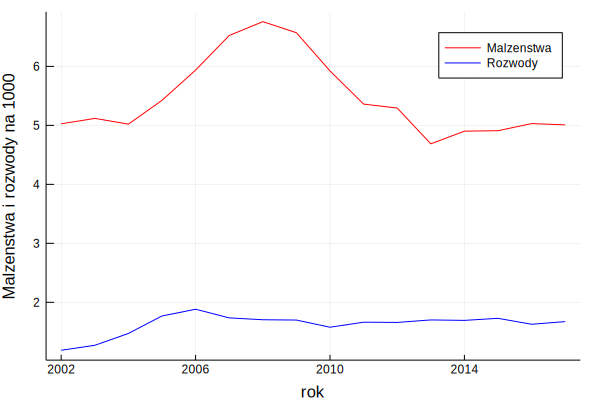

In [8]:
#małżeństwa i rozwody na 1000 mieszkańców
data1 = relevantcountrydata
plot(data1[:rok], (data1[:malzenstwa]./data1[:populacja])*1000, xticks = 2002:4:2017, label = "Malzenstwa", xlabel = "rok", ylabel = "Malzenstwa i rozwody na 1000", colour = [:red])
plot!(data1[:rok], (data1[:rozwody]./data1[:populacja])*1000, xticks = 2002:4:2017, label = "Rozwody", xlabel = "rok", ylabel = "Malzenstwa i rozwody na 1000", colour = [:blue])

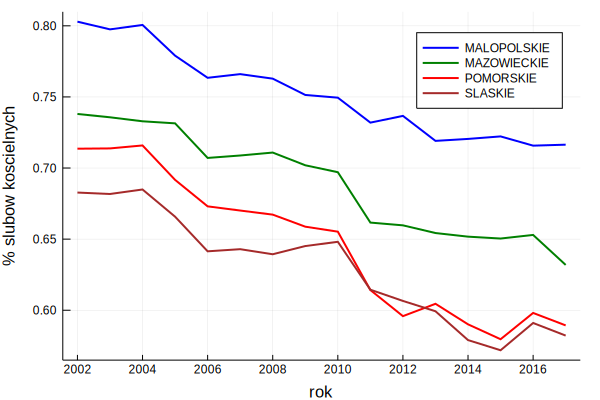

In [9]:
# porównanie % kościelnych w 4 województwach (można zmienić na dowolne inne)
#data2 = [malopolskie;mazowieckie;lodzkie;slaskie]
data2 = [malopolskie;mazowieckie;pomorskie;slaskie]
plot(
    data2[:rok],
    xticks = 2002:2:2017,
    data2[:koscielne],
    group = data2[:wojewodztwo],
    xlabel = "rok",
    ylabel = "% slubow koscielnych",
    width = 2,
    colour = [:blue :green :red :brown],
    layout = 1
    )

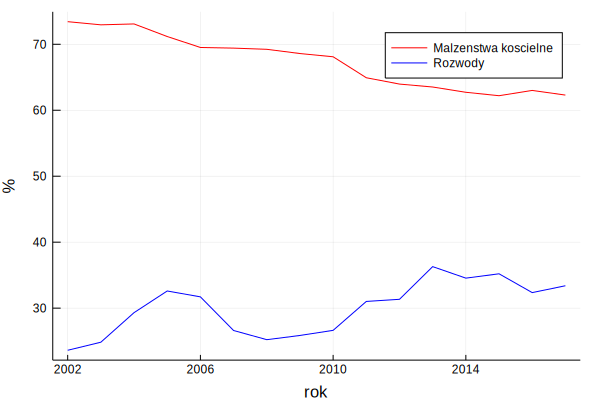

In [10]:
#% rozwodów i % małżeństw kościelnych
data1 = relevantcountrydata
plot(data1[:rok], data1[:koscielne]*100, xticks = 2002:4:2017, label = "Malzenstwa koscielne", xlabel = "rok", ylabel = "%", colour = [:red])
plot!(data1[:rok], (data1[:rozwody]./data1[:malzenstwa])*100, xticks = 2002:4:2017, label = "Rozwody", xlabel = "rok", ylabel = "%", colour = [:blue])

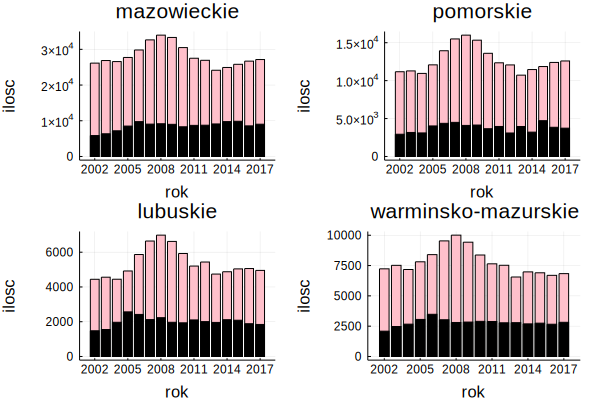

In [11]:
# Ilość małżeństw i rozwodów w danych 4 województwach (można zmienić na dowolne inne)
data1 = mazowieckie
data2 = pomorskie
data3 = lubuskie
data4 = warminsko
p1 = bar(data1[:rok], data1[:malzenstwa], xticks = 2002:3:2017, label = "", xlabel = "rok", ylabel = "ilosc", title = "mazowieckie", colour = [:pink])
bar!(data1[:rok], data1[:rozwody], label = "", colour = [:black])
p2 = bar(data2[:rok], data2[:malzenstwa], xticks = 2002:3:2017, label = "", xlabel = "rok", ylabel = "ilosc", title = "pomorskie", colour = [:pink])
bar!(data2[:rok], data2[:rozwody], label = "", colour = [:black])
p3 = bar(data3[:rok], data3[:malzenstwa], xticks = 2002:3:2017, label = "", xlabel = "rok", ylabel = "ilosc", title = "lubuskie", colour = [:pink])
bar!(data3[:rok], data3[:rozwody], label = "", colour = [:black])
p4 = bar(data4[:rok], data4[:malzenstwa], xticks = 2002:3:2017, label = "", xlabel = "rok", ylabel = "ilosc", title = "warminsko-mazurskie", colour = [:pink])
bar!(data4[:rok], data4[:rozwody], label = "", colour = [:black])
plot(p1, p2, p3, p4, layout = 4)

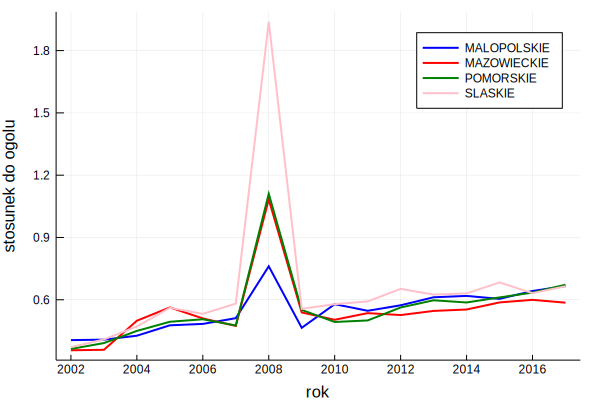

In [12]:
# jak w pobliżu 1 to tak samo, jak mniej to na wsi rzadziej się rozwodzą, jak więcej niż 1 to częściej
data2 = [malopolskie;mazowieckie;pomorskie;slaskie]
plot(
    data2[:rok],
    data2[:przezWies],
    xticks = 2002:2:2017,
    group = data2[:wojewodztwo],
    xlabel = "rok",
    ylabel = "stosunek do ogolu",
    width = 2,
    colour = [:blue :red :green :pink],
    layout = 1
    )

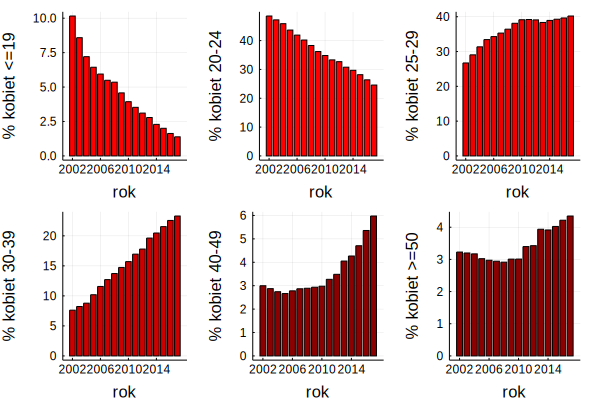

In [13]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], data1[:kob19]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet <=19", colour = [:red1])
p2 = bar(data1[:rok], data1[:kob2024]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 20-24", colour = [:red1])
p3 = bar(data1[:rok], data1[:kob2529]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 25-29", colour = [:red2])
p4 = bar(data1[:rok], data1[:kob3039]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 30-39", colour = [:red3])
p5 = bar(data1[:rok], data1[:kob4049]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 40-49", colour = [:red4])
p6 = bar(data1[:rok], data1[:kob50]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet >=50", colour = [:red4])
plot(p1, p2, p3, p4, p5, p6, layout = 6)

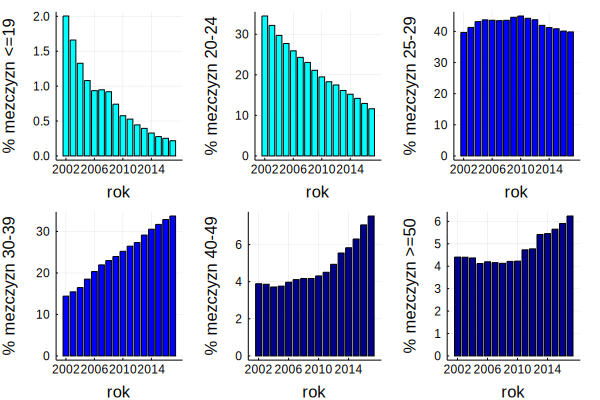

In [14]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], data1[:mez19]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn <=19", colour = [:aqua])
p2 = bar(data1[:rok], data1[:mez2024]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 20-24", colour = [:aqua])
p3 = bar(data1[:rok], data1[:mez2529]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 25-29", colour = [:blue])
p4 = bar(data1[:rok], data1[:mez3039]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 30-39", colour = [:blue])
p5 = bar(data1[:rok], data1[:mez4049]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 40-49", colour = [:blue4])
p6 = bar(data1[:rok], data1[:mez50]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn >=50", colour = [:blue4])
plot(p1, p2, p3, p4, p5, p6, layout = 6)

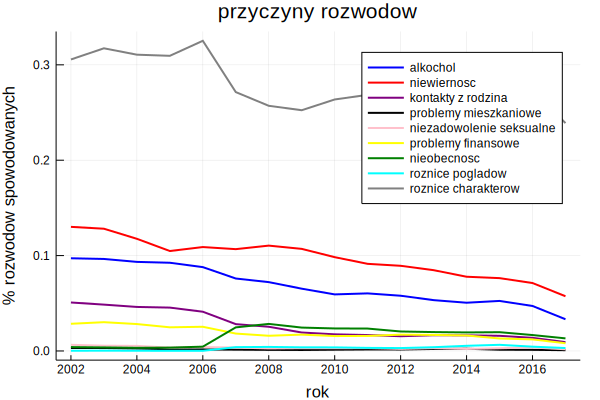

In [15]:
data2 = relevantcountrydata
plot(
    data2[:rok],
    data2[:alkochol],
    xticks = 2002:2:2017,
    xlabel = "rok",
    ylabel = "% rozwodow spowodowanych",
    title = "przyczyny rozwodow",
    label = "alkochol",
    width = 2,
    colour = [:blue]
    )
plot!(
    data2[:rok],
    data2[:zdrada],
    xticks = 2002:2:2017,
    label = "niewiernosc",
    width = 2,
    colour = [:red]
    )
plot!(
    data2[:rok],
    data2[:rodzina],
    xticks = 2002:2:2017,
    label = "kontakty z rodzina",
    width = 2,
    colour = [:purple]
    )
plot!(
    data2[:rok],
    data2[:mieszkanie],
    xticks = 2002:2:2017,
    label = "problemy mieszkaniowe",
    width = 2,
    colour = [:black]
    )
plot!(
    data2[:rok],
    data2[:seks],
    xticks = 2002:2:2017,
    label = "niezadowolenie seksualne",
    width = 2,
    colour = [:pink]
    )
plot!(
    data2[:rok],
    data2[:finanse],
    xticks = 2002:2:2017,
    label = "problemy finansowe",
    width = 2,
    colour = [:yellow]
    )
plot!(
    data2[:rok],
    data2[:nieobecnosc],
    xticks = 2002:2:2017,
    label = "nieobecnosc",
    width = 2,
    colour = [:green]
    )
plot!(
    data2[:rok],
    data2[:poglady],
    xticks = 2002:2:2017,
    label = "roznice pogladow",
    width = 2,
    colour = [:aqua]
    )
plot!(
    data2[:rok],
    data2[:charaktery],
    xticks = 2002:2:2017,
    label = "roznice charakterow",
    width = 2,
    colour = [:grey]
    )

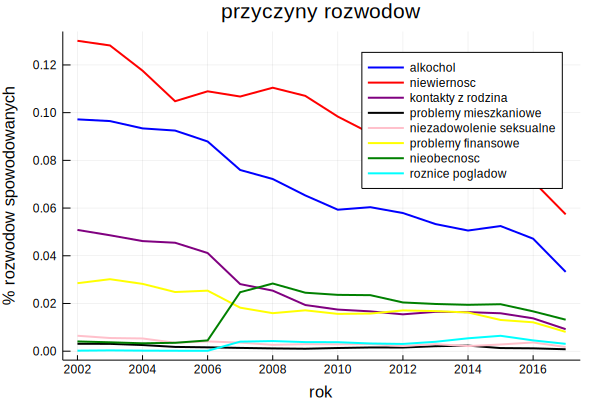

In [16]:
data2 = relevantcountrydata
plot(
    data2[:rok],
    data2[:alkochol],
    xticks = 2002:2:2017,
    xlabel = "rok",
    ylabel = "% rozwodow spowodowanych",
    title = "przyczyny rozwodow",
    label = "alkochol",
    width = 2,
    colour = [:blue]
    )
plot!(
    data2[:rok],
    data2[:zdrada],
    xticks = 2002:2:2017,
    label = "niewiernosc",
    width = 2,
    colour = [:red]
    )
plot!(
    data2[:rok],
    data2[:rodzina],
    xticks = 2002:2:2017,
    label = "kontakty z rodzina",
    width = 2,
    colour = [:purple]
    )
plot!(
    data2[:rok],
    data2[:mieszkanie],
    xticks = 2002:2:2017,
    label = "problemy mieszkaniowe",
    width = 2,
    colour = [:black]
    )
plot!(
    data2[:rok],
    data2[:seks],
    xticks = 2002:2:2017,
    label = "niezadowolenie seksualne",
    width = 2,
    colour = [:pink]
    )
plot!(
    data2[:rok],
    data2[:finanse],
    xticks = 2002:2:2017,
    label = "problemy finansowe",
    width = 2,
    colour = [:yellow]
    )
plot!(
    data2[:rok],
    data2[:nieobecnosc],
    xticks = 2002:2:2017,
    label = "nieobecnosc",
    width = 2,
    colour = [:green]
    )
plot!(
    data2[:rok],
    data2[:poglady],
    xticks = 2002:2:2017,
    label = "roznice pogladow",
    width = 2,
    colour = [:aqua]
    )

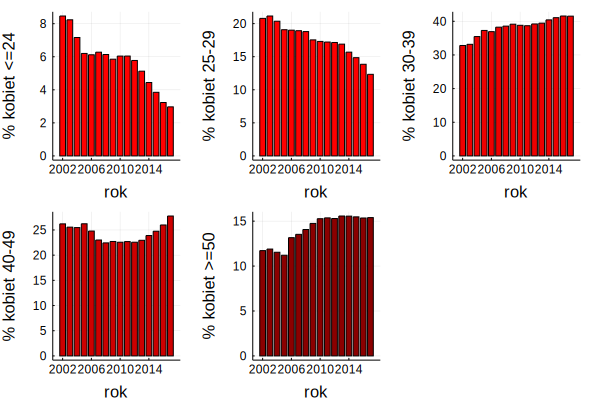

In [17]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], data1[:przezkob24]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet <=24", colour = [:red1])
p2 = bar(data1[:rok], data1[:przezkob2529]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 25-29", colour = [:red1])
p3 = bar(data1[:rok], data1[:przezkob3039]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 30-39", colour = [:red2])
p4 = bar(data1[:rok], data1[:przezkob4049]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet 40-49", colour = [:red3])
p5 = bar(data1[:rok], data1[:przezkob50]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% kobiet >=50", colour = [:red4])
plot(p1, p2, p3, p4, p5,layout = 5)

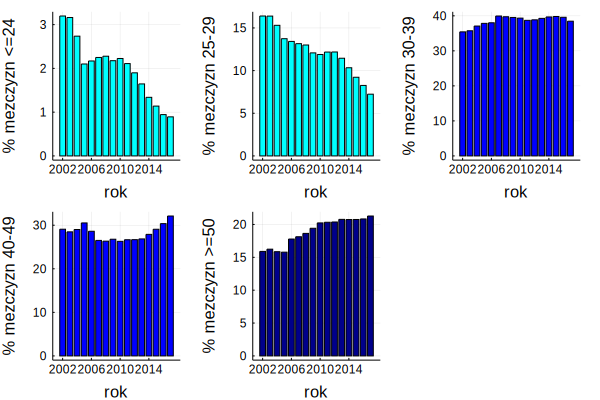

In [18]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], data1[:przezmez24]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn <=24", colour = [:aqua])
p2 = bar(data1[:rok], data1[:przezmez2529]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 25-29", colour = [:aqua])
p3 = bar(data1[:rok], data1[:przezmez3039]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 30-39", colour = [:blue])
p4 = bar(data1[:rok], data1[:przezmez4049]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 40-49", colour = [:blue])
p5 = bar(data1[:rok], data1[:przezmez50]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn >=50", colour = [:blue4])
plot(p1, p2, p3, p4, p5,layout = 5)

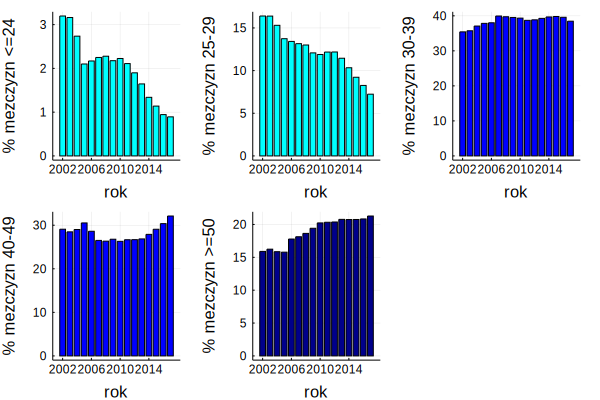

In [19]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], data1[:przezmez24]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn <=24", colour = [:aqua])
p2 = bar(data1[:rok], data1[:przezmez2529]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 25-29", colour = [:aqua])
p3 = bar(data1[:rok], data1[:przezmez3039]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 30-39", colour = [:blue])
p4 = bar(data1[:rok], data1[:przezmez4049]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 40-49", colour = [:blue])
p5 = bar(data1[:rok], data1[:przezmez50]*100, xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn >=50", colour = [:blue4])
plot(p1, p2, p3, p4, p5,layout = 5)

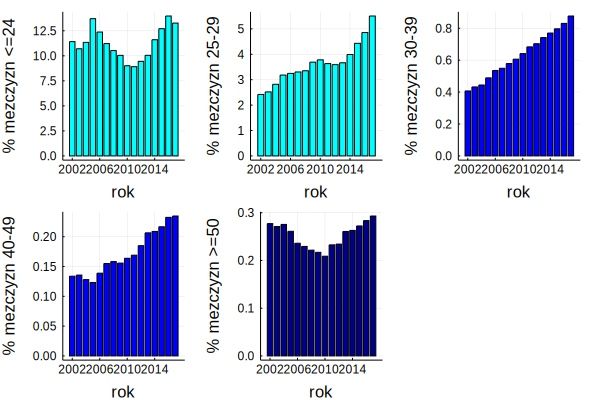

In [20]:
data1 = relevantcountrydata
p1 = bar(data1[:rok], (data1[:mez19].+data1[:mez2024])./data1[:przezmez24], xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn <=24", colour = [:aqua])
p2 = bar(data1[:rok], data1[:mez2529]./data1[:przezmez2529], xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 25-29", colour = [:aqua])
p3 = bar(data1[:rok], data1[:mez3039]./data1[:przezmez3039], xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 30-39", colour = [:blue])
p4 = bar(data1[:rok], data1[:mez4049]./data1[:przezmez4049], xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn 40-49", colour = [:blue])
p5 = bar(data1[:rok], data1[:mez50]./data1[:przezmez50], xticks = 2002:4:2017, label = "", xlabel = "rok", ylabel = "% mezczyzn >=50", colour = [:blue4])
plot(p1, p2, p3, p4, p5,layout = 5)

In [21]:
data1 = rawdata
#korelacja między %rozwodów, a %małżeństw kościelnych
cor(data1[:21]./data1[:5],data1[:6]./data1[:5])

-0.7772749119559511

In [22]:
zarobki = data1[:33]
zarobkiFloat = Float64[]
for x in zarobki
    a = split(x,",")
    if length(a) == 1 push!(zarobkiFloat, parse(Float64,a[1])) end
    if length(a) == 2 push!(zarobkiFloat, parse(Float64,string(a[1],".",a[2]))) end
end
#korelacja między %rozwodów, a średnimi zarobkami
cor(data1[:21]./data1[:5],zarobkiFloat)

0.31081030604494975

In [23]:
zatrudnienie = data1[:34]
populacja = rawdata[:4]
feminizacja = data1[:35]
#korelacja między %rozwodów, a % zatrudnieniem kobiet
cor(data1[:21]./data1[:5],zatrudnienie./((populacja./2).*(feminizacja./100)))

-0.17493453446116358

In [24]:
#korelacja między %rozwodów, a wspolczynnikiem feminizacji
cor(data1[:21]./data1[:5],feminizacja)

0.2534867299040949

In [25]:
dzietnosc = data1[:36]
dzietnoscFloat = Float64[]
for x in dzietnosc
    a = split(x,",")
    if length(a) == 1 push!(dzietnoscFloat, parse(Float64,a[1])) end
    if length(a) == 2 push!(dzietnoscFloat, parse(Float64,string(a[1],".",a[2]))) end
end
#korelacja między %rozwodów, a dzietnoscia
cor(data1[:21]./data1[:5],dzietnoscFloat)

-0.17762336546045945

In [26]:
zgony = data1[:37]
zgonyFloat = Float64[]
for x in zgony
    a = split(x,",")
    if length(a) == 1 push!(zgonyFloat, parse(Float64,a[1])) end
    if length(a) == 2 push!(zgonyFloat, parse(Float64,string(a[1],".",a[2]))) end
end
#korelacja między %rozwodów, a współczynnikiem zgonów niemowląt
cor(data1[:21]./data1[:5],zgonyFloat)

-0.10971415316743013

In [28]:
Dziękujemy za uwagę :)